<a href="https://colab.research.google.com/github/MahaChlouh/airtraffic/blob/main/Airtraffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
!pip install mlforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
!pip install neuralforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Packages

In [74]:
import numpy as np
import pandas as pd
import datetime
import plotly
import plotly.offline as pyoff
import plotly.graph_objs as go
import seaborn as sns
import folium
import logging
import lightgbm as lgb
import xgboost as xgb
from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport # from April, 1st 2023
#from ydata_profiling import ProfileReport
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestRegressor
from mlforecast import MLForecast
from numba import njit
#from window_ops.expanding import expanding_mean
#from window_ops.rolling import rolling_mean
from plotly.subplots import make_subplots
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from joblib import dump, load
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS



# Analyze traffic dataset ✈

Use fbprophet, nixtla ml forecast and nixtla neural forecaster.

In [75]:
traffic_df = pd.read_parquet('traffic_10lines.parquet')

In [76]:
traffic_df.describe(include='all').transpose()

count  unique                  top    freq  \
date                  254899    2626  2019-01-02 00:00:00     165   
pax                 254899.0     NaN                  NaN     NaN   
seats               250749.0     NaN                  NaN     NaN   
flight_type           251168      19                    J  240627   
flight_typename       254899       4            Scheduled  251250   
home_airport          254899       8                  LIS  125254   
paired_airport        254899      10                  OPO   72331   
home_airportname      254899       8               Lisbon  125254   
paired_airportname    254899      10                Porto   72331   
distance            254899.0    <NA>                 <NA>    <NA>   
flight_number         251438    2663               TP 433    2332   
airline_iata          248648      90                   TP   91648   
airline_name          254813     131                  TAP   91648   
scheduled_datetime    254899  201668  2019-08-29 18:05:00       5   
direction             254899       2                    D  127622   
home_country          254899       7                   PT  125254   
paired_country        254899       8                   PT   72331   
home_countryname      254899       7             Portugal  125254   
paired_countryname    254899       8             Portugal   72331   
travel_area           254899       4             Domestic  108770   
aircraft_type         251439     168                 A320   30344   

                                  first                 last        mean  \
date                2016-01-01 00:00:00  2023-03-10 00:00:00         NaN   
pax                                 NaN                  NaN  127.082676   
seats                               NaN                  NaN  159.352879   
flight_type                         NaN                  NaN         NaN   
flight_typename                     NaN                  NaN         NaN   
home_airport                        NaN                  NaN         NaN   
paired_airport                      NaN                  NaN         NaN   
home_airportname                    NaN                  NaN         NaN   
paired_airportname                  NaN                  NaN         NaN   
distance                           <NA>                 <NA>  944.365078   
flight_number                       NaN                  NaN         NaN   
airline_iata                        NaN                  NaN         NaN   
airline_name                        NaN                  NaN         NaN   
scheduled_datetime  2016-01-01 06:10:00  2023-03-10 00:50:00         NaN   
direction                           NaN                  NaN         NaN   
home_country                        NaN                  NaN         NaN   
paired_country                      NaN                  NaN         NaN   
home_countryname                    NaN                  NaN         NaN   
paired_countryname                  NaN                  NaN         NaN   
travel_area                         NaN                  NaN         NaN   
aircraft_type                       NaN                  NaN         NaN   

                           std    min    25%     50%     75%      max  
date                       NaN    NaN    NaN     NaN     NaN      NaN  
pax                  53.050019  -11.0   88.0   140.0   168.0    582.0  
seats                47.311964    0.0  144.0   174.0   186.0    615.0  
flight_type                NaN    NaN    NaN     NaN     NaN      NaN  
flight_typename            NaN    NaN    NaN     NaN     NaN      NaN  
home_airport               NaN    NaN    NaN     NaN     NaN      NaN  
paired_airport             NaN    NaN    NaN     NaN     NaN      NaN  
home_airportname           NaN    NaN    NaN     NaN     NaN      NaN  
paired_airportname         NaN    NaN    NaN     NaN     NaN      NaN  
distance            886.540144  277.0  277.0  1109.0  1437.0  11653.0  
flight_number              NaN    NaN  

In [77]:
profile_report = ProfileReport(traffic_df)

In [78]:
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
profile_report.to_file(output_file="profile_report_airtraffic.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [80]:
traffic_df

date    pax  seats flight_type flight_typename home_airport  \
3223247  2018-08-04  155.0  156.0           J       Scheduled          LGW   
3223311  2017-05-03  132.0  144.0           J       Scheduled          LGW   
3223347  2022-08-05  136.0  156.0           J       Scheduled          LGW   
3223366  2019-10-16  170.0  180.0           J       Scheduled          LGW   
3223425  2019-01-26  166.0  180.0           J       Scheduled          LGW   
...             ...    ...    ...         ...             ...          ...   
9977453  2022-04-19   72.0  216.0           J       Scheduled          SCL   
9977758  2020-03-22  162.0  216.0           J       Scheduled          SCL   
9977808  2021-12-23  164.0  313.0           J       Scheduled          SCL   
9995284  2019-04-06  161.0  216.0           J       Scheduled          SCL   
10014282 2022-09-04  191.0  216.0           J       Scheduled          SCL   

         paired_airport                                   home_airportname  \
3223247             BCN                             London Gatwick Airport   
3223311             BCN                             London Gatwick Airport   
3223347             BCN                             London Gatwick Airport   
3223366             BCN                             London Gatwick Airport   
3223425             BCN                             London Gatwick Airport   
...                 ...                                                ...   
9977453             LHR  Comodoro Arturo Merino Benitez International A...   
9977758             LHR  Comodoro Arturo Merino Benitez International A...   
9977808             LHR  Comodoro Arturo Merino Benitez International A...   
9995284             LHR  Comodoro Arturo Merino Benitez International A...   
10014282            LHR  Comodoro Arturo Merino Benitez International A...   

               paired_airportname  distance  ... airline_iata  \
3223247                 Barcelone      1109  ...           U2   
3223311                 Barcelone      1109  ...           BA   
3223347                 Barcelone      1109  ...           U2   
3223366                 Barcelone      1109  ...           EC   
3223425                 Barcelone      1109  ...           U2   
...                           ...       ...  ...          ...   
9977453   London Heathrow Airport     11653  ...           BA   
9977758   London Heathrow Airport     11653  ...           BA   
9977808   London Heathrow Airport     11653  ...           BA   
9995284   London Heathrow Airport     11653  ...           BA   
10014282  London Heathrow Airport     11653  ...           BA   

             airline_name  scheduled_datetime direction home_country  \
3223247           EasyJet 2018-08-04 12:15:00         A           GB   
3223311   British Airways 2017-05-03 11:20:00         D           GB   
3223347           EasyJet 2022-08-05 21:55:00         A           GB   
3223366           EasyJet 2019-10-16 09:10:00         D           GB   
3223425           EasyJet 2019-01-26 06:55:00         D           GB   
...                   ...                 ...       ...          ...   
9977453   British Airways 2022-04-19 07:25:00         A           CL   
9977758   British Airways 2020-03-22 16:45:00         D           CL   
9977808   British Airways 2021-12-23 10:04:00         A           CL   
9995284   British Airways 2019-04-06 08:35:00         A           CL   
10014282  British Airways 2022-09-04 07:59:00         A           CL   

         paired_country home_countryname paired_countryname  \
3223247              ES   United Kingdom              Spain   
3223311              ES   United Kingdom              Spain   
3223347              ES   United Kingdom              Spain   
3223366              ES   United Kingdom              Spain   
3223425              ES   United Kingdom              Spain   
...                 ...              ...                ...   
9977453              GB            Chile     United Ki

In [81]:
(traffic_df
 .groupby(['home_airport', 'paired_airport', 'direction'])
 .agg(date_min=('date', 'min'), date_max=('date', 'max'), pax=('pax', 'sum'))
 .reset_index()
)

home_airport paired_airport direction   date_min   date_max        pax
0           LGW            AMS         A 2016-01-01 2023-03-09  2686346.0
1           LGW            AMS         D 2016-01-01 2023-03-09  2686476.0
2           LGW            BCN         A 2016-01-01 2023-03-10  3813240.0
3           LGW            BCN         D 2016-01-01 2023-03-09  3799836.0
4           LIS            OPO         A 2016-01-01 2023-03-09  2819094.0
5           LIS            OPO         D 2016-01-01 2023-03-09  2813651.0
6           LIS            ORY         A 2016-01-01 2023-03-09  3835664.0
7           LIS            ORY         D 2016-01-01 2023-03-09  3860404.0
8           LYS            PIS         A 2017-11-20 2023-03-09     6173.0
9           LYS            PIS         D 2018-01-02 2023-03-09     4178.0
10          NTE            FUE         A 2019-01-06 2023-03-05    51406.0
11          NTE            FUE         D 2019-01-06 2023-03-05    48448.0
12          PNH            NGB         A 2017-01-11 2020-02-04     5674.0
13          PNH            NGB         D 2016-05-05 2023-03-07     4344.0
14          POP            JFK         A 2018-01-01 2023-03-09   244235.0
15          POP            JFK         D 2018-01-01 2023-03-09   248199.0
16          SCL            LHR         A 2019-01-01 2023-03-07    95959.0
17          SCL            LHR         D 2019-01-01 2023-03-07    97734.0
18          SSA            GRU         A 2019-01-01 2023-03-09  2609960.0
19          SSA            GRU         D 2019-01-01 2023-03-09  2662226.0

## Visualization

In [82]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 ['airline_name']
 .value_counts()
)

Volotea                362
Smartwings             140
Transavia               98
Enter Air               81
ASL Airlines France      1
Ryanair                  1
Name: airline_name, dtype: int64

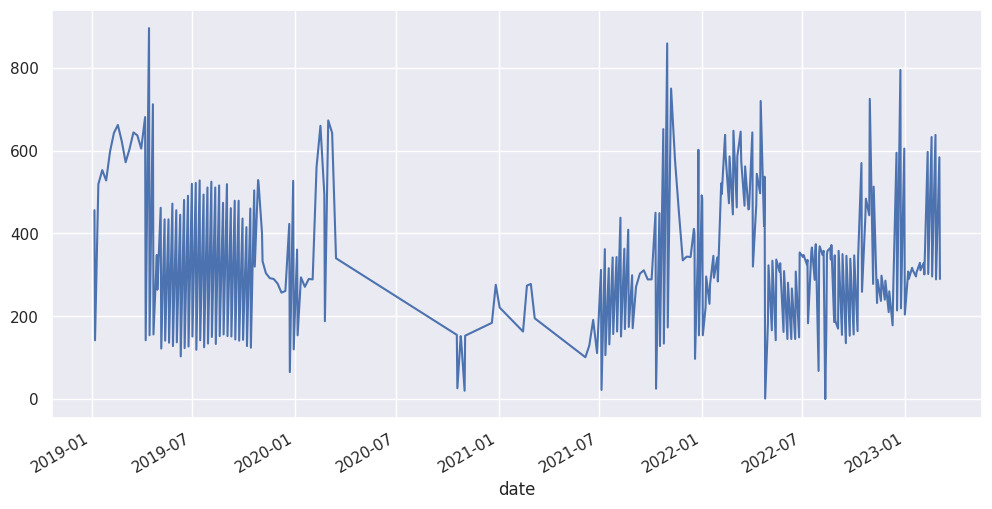

In [83]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [84]:
# Si vous êtes sous Jupyter
%matplotlib inline

In [85]:
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [86]:
import seaborn as sns

sns.set()

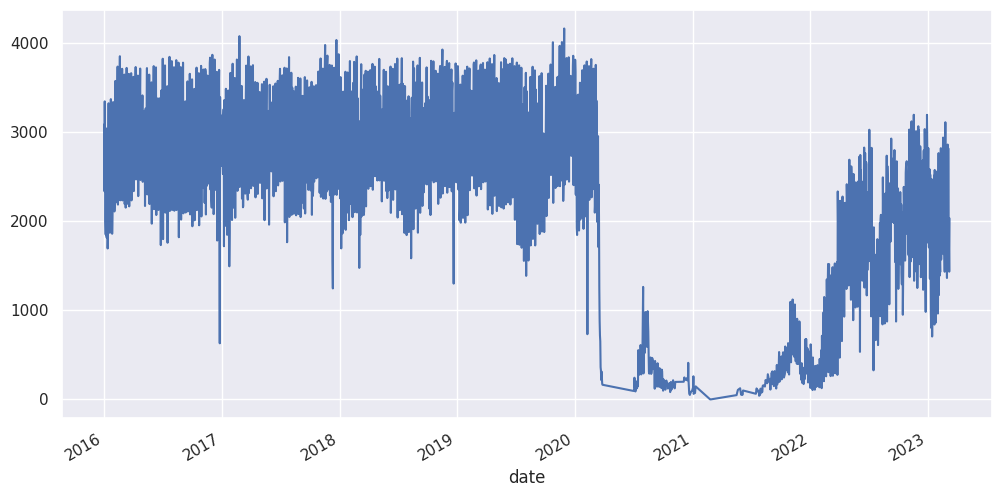

In [87]:
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12, 6))
);

In [88]:


def draw_ts_multiple(df: pd.DataFrame, v1: str, v2: str=None, prediction: str=None, date: str='date',
              secondary_y=True, covid_zone=False, display=True):
  """Draw times series possibly on two y axis, with COVID period option.

  Args:
  - df (pd.DataFrame): time series dataframe (one line per date, series in columns)
  - v1 (str | list[str]): name or list of names of the series to plot on the first x axis
  - v2 (str): name of the serie to plot on the second y axis (default: None)
  - prediction (str): name of v1 hat (prediction) displayed with a dotted line (default: None)
  - date (str): name of date column for time (default: 'date')
  - secondary_y (bool): use a secondary y axis if v2 is used (default: True)
  - covid_zone (bool): highlight COVID-19 period with a grayed rectangle (default: False)
  - display (bool): display figure otherwise just return the figure (default: True)

  Returns:
  - fig (plotly.graph_objs._figure.Figure): Plotly figure generated

  Notes:
  Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
  Or use `display=False`.
  """
  if isinstance(v1, str):
    variables = [(v1, 'V1')]
  else:
    variables = [(v, 'V1.{}'.format(i)) for i, v in enumerate(v1)]
  title = '<br>'.join([n + ': '+ v for v, n in variables]) + ('<br>V2: ' + v2) if v2 else '<br>'.join([v + ': '+ n for v, n in variables])
  layout = dict(
    title=title,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
  )
  fig = make_subplots(specs=[[{"secondary_y": True}]])
  fig.update_layout(layout)
  for v, name in variables:
    fig.add_trace(go.Scatter(x=df[date], y=df[v], name=name), secondary_y=False)
  if v2:
    fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
    fig['layout']['yaxis2']['showgrid'] = False
    fig.update_yaxes(rangemode='tozero')
    fig.update_layout(margin=dict(t=125 + 30 * (len(variables) - 1)))
  if prediction:
    fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

  if covid_zone:
    fig.add_vrect(
        x0=pd.Timestamp("2020-03-01"), x1=pd.Timestamp("2022-01-01"),
        fillcolor="Gray", opacity=0.5,
        layer="below", line_width=0,
    )
  if display:
    pyoff.iplot(fig)
  return fig

In [89]:
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LGW" and paired_airport == "AMS"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total',
    covid_zone=True,
);

In [90]:
nte_fue_df = (traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
)
nte_fue_df

home_airport paired_airport       date  pax_total
0            NTE            FUE 2019-01-06      456.0
1            NTE            FUE 2019-01-07      142.0
2            NTE            FUE 2019-01-13      519.0
3            NTE            FUE 2019-01-20      553.0
4            NTE            FUE 2019-01-27      528.0
..           ...            ...        ...        ...
288          NTE            FUE 2023-02-19      296.0
289          NTE            FUE 2023-02-25      638.0
290          NTE            FUE 2023-02-26      289.0
291          NTE            FUE 2023-03-04      584.0
292          NTE            FUE 2023-03-05      290.0

[293 rows x 4 columns]

In [91]:
lgw_ams_df = (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
)
lgw_ams_df

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

##Forecast

### Prophet

#### Fit the model on a selected route

In [92]:
def generate_route_df(traffic_df: pd.DataFrame, homeAirport: str, pairedAirport: str) -> pd.DataFrame:
  """Extract route dataframe from traffic dataframe for route from home airport to paired airport

  Args:
  - traffic_df (pd.DataFrame): traffic dataframe
  - homeAirport (str): IATA Code for home airport
  - pairedAirport (str): IATA Code for paired airport

  Returns:
  - pd.DataFrame: aggregated daily PAX traffic on route (home-paired)
  """
  _df = (traffic_df
         .query('home_airport == "{home}" and paired_airport == "{paired}"'.format(home=homeAirport, paired=pairedAirport))
         .groupby(['home_airport', 'paired_airport', 'date'])
         .agg(pax_total=('pax', 'sum'))
         .reset_index()
         )
  return _df

In [93]:
generate_route_df(traffic_df, "LGW", "AMS")

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

In [94]:
from prophet import Prophet

In [95]:
baseline_model = Prophet()
baseline_model.fit(generate_route_df(traffic_df, "NTE", "FUE").rename(columns={'date': 'ds', 'pax_total': 'y'}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [96]:
future_df = baseline_model.make_future_dataframe(periods=15) # Prepare to predict 15 days
future_df

ds
0   2019-01-06
1   2019-01-07
2   2019-01-13
3   2019-01-20
4   2019-01-27
..         ...
303 2023-03-16
304 2023-03-17
305 2023-03-18
306 2023-03-19
307 2023-03-20

[308 rows x 1 columns]

In [97]:
forecast_df = baseline_model.predict(future_df)

In [98]:
forecast_df

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2019-01-06  366.987264  338.057314  633.670160   366.987264   366.987264   
1   2019-01-07  366.754933   67.206318  379.134633   366.754933   366.754933   
2   2019-01-13  365.360946  270.447567  566.520229   365.360946   365.360946   
3   2019-01-20  363.734627  270.665603  561.753858   363.734627   363.734627   
4   2019-01-27  362.108309  325.250341  613.063132   362.108309   362.108309   
..         ...         ...         ...         ...          ...          ...   
303 2023-03-16  250.086252  -24.800553  271.546329   250.086252   250.086252   
304 2023-03-17  250.129075  278.034600  571.516951   250.129075   250.129075   
305 2023-03-18  250.171898  339.054289  628.540373   250.171438   250.171898   
306 2023-03-19  250.214721  372.556255  669.641623   250.210604   250.214721   
307 2023-03-20  250.257544  102.385571  416.547460   250.252121   250.259233   

     additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0        113.963365            113.963365            113.963365  136.806409   
1       -148.140453           -148.140453           -148.140453 -115.899406   
2         56.838713             56.838713             56.838713  136.806409   
3         49.792236             49.792236             49.792236  136.806409   
4        103.916880            103.916880            103.916880  136.806409   
..              ...                   ...                   ...         ...   
303     -132.497205           -132.497205           -132.497205 -256.348557   
304      168.375159            168.375159            168.375159   44.060402   
305      227.954512            227.954512            227.954512  103.260604   
306      261.821769            261.821769            261.821769  136.806409   
307        9.411225              9.411225              9.411225 -115.899406   

     weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0      136.806409    136.806409  -22.843043    -22.843043    -22.843043   
1     -115.899406   -115.899406  -32.241047    -32.241047    -32.241047   
2      136.806409    136.806409  -79.967696    -79.967696    -79.967696   
3      136.806409    136.806409  -87.014173    -87.014173    -87.014173   
4      136.806409    136.806409  -32.889528    -32.889528    -32.889528   
..            ...           ...         ...           ...           ...   
303   -256.348557   -256.348557  123.851352    123.851352    123.851352   
304     44.060402     44.060402  124.314757    124.314757    124.314757   
305    103.260604    103.260604  124.693908    124.693908    124.693908   
306    136.806409    136.806409  125.015360    125.015360    125.015360   
307   -115.899406   -115.899406  125.310631    125.310631    125.310631   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
303                   0.0                         0.0   
304                   0.0                         0.0   
305                   0.0                         0.0   
306                   0.0                         0.0   
307                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
0                           0.0  480.950629  
1                           0.0  218.614479  
2                           0.0  422.199658  
3                           0.0  413.526863  
4                           0.0  466.025189  
..                          ...         ...  
303                         0.0  117.589047  
304                         0.0  418.504234  
305                         0.0  478.126410  
306                         0.0  512.036491  
307       

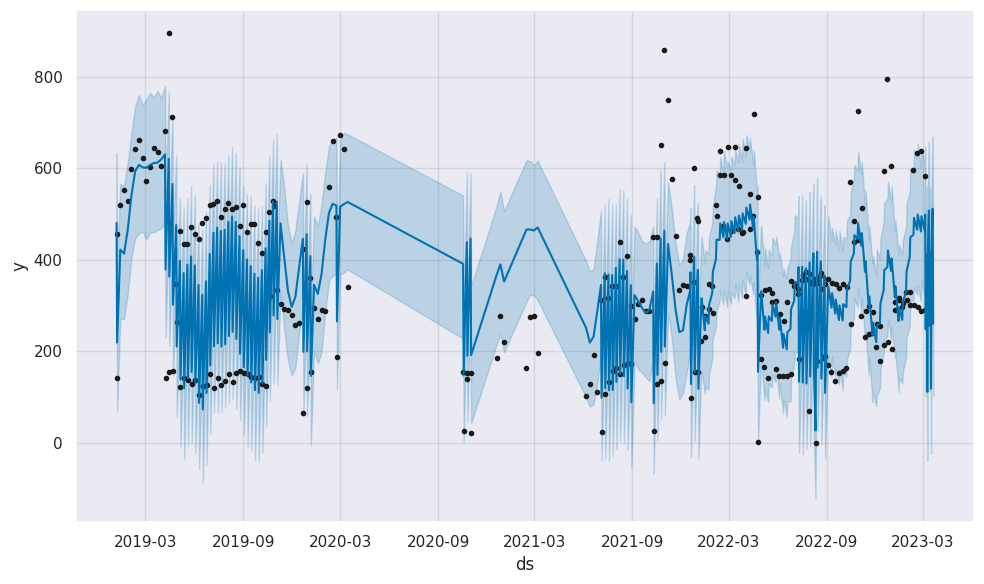

In [99]:
graph = baseline_model.plot(forecast_df)

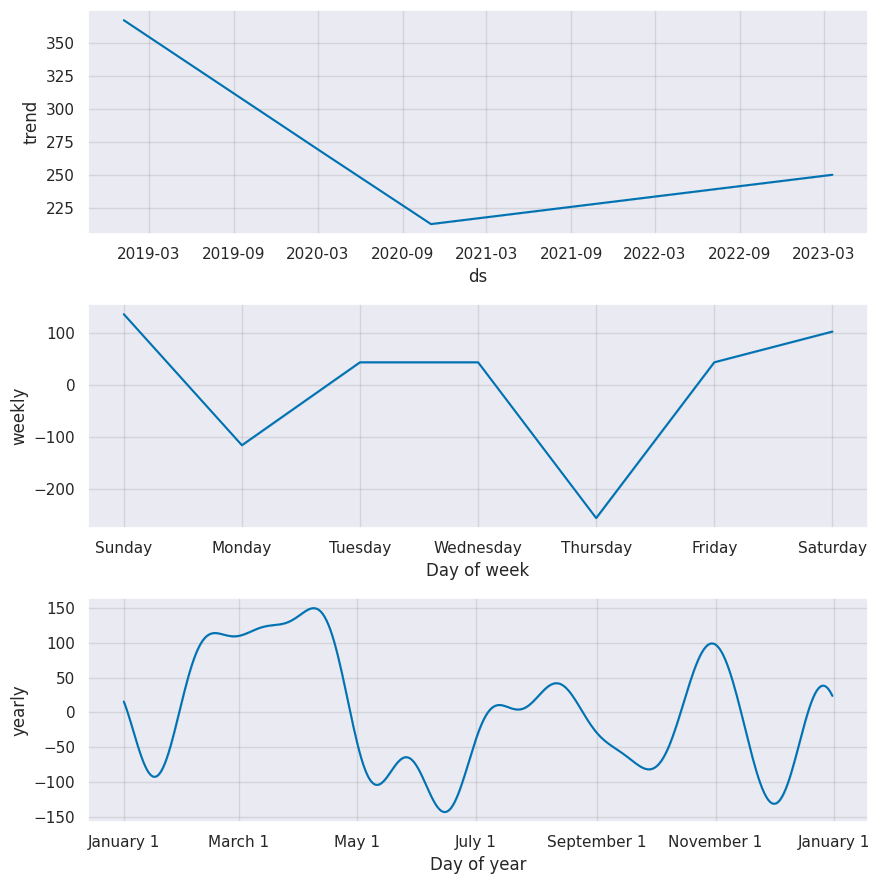

In [100]:
baseline_model.plot_components(forecast_df);

#### Evaluate performance

In [101]:
from prophet.diagnostics import cross_validation

In [102]:
eval_df = cross_validation(baseline_model, initial='366 days', period='90 days', horizon='90 days')

INFO:prophet:Making 10 forecasts with cutoffs between 2020-09-16 00:00:00 and 2022-12-05 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

In [103]:
eval_df

ds        yhat  yhat_lower  yhat_upper      y     cutoff
0   2020-10-18  447.472952  353.094870  539.783947  155.0 2020-09-16
1   2020-10-19  124.280990   28.239533  221.401313   26.0 2020-09-16
2   2020-10-25  488.585274  406.058277  577.937451  152.0 2020-09-16
3   2020-10-26  153.801841   56.851847  246.124440  139.0 2020-09-16
4   2020-11-01  439.584883  348.829806  529.662759   20.0 2020-09-16
..         ...         ...         ...         ...    ...        ...
189 2023-02-19  562.993455  434.832326  693.255769  296.0 2022-12-05
190 2023-02-25  465.255019  317.036715  599.447209  638.0 2022-12-05
191 2023-02-26  553.509927  414.160259  685.954629  289.0 2022-12-05
192 2023-03-04  465.385062  325.180169  602.099235  584.0 2022-12-05
193 2023-03-05  555.602132  416.367265  692.210661  290.0 2022-12-05

[194 rows x 6 columns]

In [104]:
performance_metrics(eval_df)

INFO:prophet:Skipping MAPE because y close to 0


horizon           mse        rmse         mae     mdape     smape  coverage
0  10 days   7964.572025   89.244451   72.291339  0.209460  0.282279  0.736842
1  11 days   9346.762087   96.678654   78.280908  0.227023  0.317436  0.710526
2  12 days  12625.430698  112.362942   86.326633  0.209460  0.325730  0.684211
3  13 days  13687.832616  116.995011   90.400662  0.229651  0.334530  0.657895
4  14 days  12874.968302  113.467918   85.317102  0.192882  0.318882  0.684211
..     ...           ...         ...         ...       ...       ...       ...
76 86 days  35044.098263  187.200690  154.016154  0.566636  0.616390  0.403509
77 87 days  31087.535293  176.316577  150.802874  0.497562  0.555897  0.368421
78 88 days  28591.350991  169.089772  142.621852  0.445899  0.528505  0.368421
79 89 days  24919.942869  157.860517  131.487817  0.388496  0.490253  0.473684
80 90 days  27910.967928  167.065759  140.636592  0.497562  0.575879  0.421053

[81 rows x 7 columns]

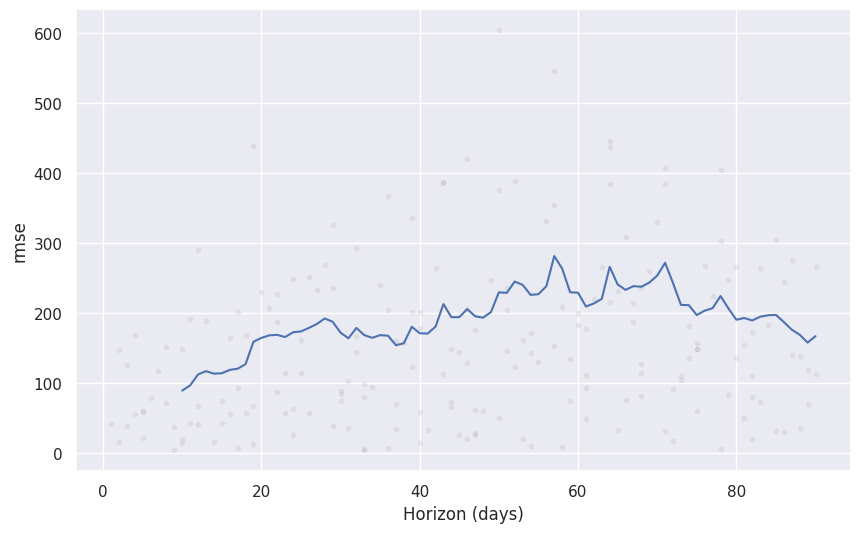

In [105]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(eval_df, metric='rmse');

#### Automate model fitting and evaluation

In [106]:
routes = (traffic_df
 .drop_duplicates(subset=['home_airport', 'paired_airport'])
 [['home_airport', 'paired_airport']]
 .to_dict(orient='rows')
)

In [107]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
#logging.getLogger('prophet').setLevel(logging.WARNING)

In [108]:
models = dict()
performances = dict()

for route in routes:
  print(route)
  home = route['home_airport']
  paired = route['paired_airport']
  # Build route traffic dataframe
  _df = generate_route_df(traffic_df, home, paired)
  # Create a model
  _model = Prophet()
  # Fit the model
  _model.fit(_df.rename(columns={'date': 'ds', 'pax_total': 'y'}))
  # Cross validate the model
  _cv_df = cross_validation(_model, horizon='90 days', parallel="processes")
  _perf_df = performance_metrics(_cv_df, rolling_window=1)
  # Save results
  models[(route['home_airport'], route['paired_airport'])] = _model
  performances[(route['home_airport'], route['paired_airport'])] = _perf_df['rmse'].values[0]
  

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LGW', 'paired_airport': 'BCN'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-10 00:00:00 and 2022-12-10 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f49b6e89630>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LGW', 'paired_airport': 'AMS'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4a14e54640>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LIS', 'paired_airport': 'ORY'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4a14e899f0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LIS', 'paired_airport': 'OPO'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f49b6e810c0>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'SSA', 'paired_airport': 'GRU'}


INFO:prophet:Making 24 forecasts with cutoffs between 2020-02-08 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f49b6ed7a60>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'NTE', 'paired_airport': 'FUE'}


INFO:prophet:Making 20 forecasts with cutoffs between 2020-08-02 00:00:00 and 2022-12-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f49b712d7b0>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 26 forecasts with cutoffs between 2018-11-24 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f49b6f593f0>


{'home_airport': 'LYS', 'paired_airport': 'PIS'}


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints g

{'home_airport': 'PNH', 'paired_airport': 'NGB'}


INFO:prophet:Making 11 forecasts with cutoffs between 2017-10-02 00:00:00 and 2022-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f49b717eb60>
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'POP', 'paired_airport': 'JFK'}


INFO:prophet:Making 32 forecasts with cutoffs between 2019-02-13 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f49b6f5ae00>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 13 forecasts with cutoffs between 2020-01-04 00:00:00 and 2022-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f49b6fbef50>


{'home_airport': 'SCL', 'paired_airport': 'LHR'}


In [109]:
models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f4a15b7d3c0>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f49b717eb00>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f4a14eafb50>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f49b71b68c0>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f49b711f4f0>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f49b71b66e0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f4a14bde800>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f49b6f58d90>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f4a14bcc460>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f49b6ed4550>}

In [110]:
performances

{('LGW', 'BCN'): 1252.80455530257,
 ('LGW', 'AMS'): 927.4295007587415,
 ('LIS', 'ORY'): 871.9787557259463,
 ('LIS', 'OPO'): 607.0948037131809,
 ('SSA', 'GRU'): 1952.9757983596164,
 ('NTE', 'FUE'): 192.23652122836083,
 ('LYS', 'PIS'): 632.5392618552802,
 ('PNH', 'NGB'): 1562.754400403463,
 ('POP', 'JFK'): 76.63391104712609,
 ('SCL', 'LHR'): 146.91799138474485}

#### Save models

In [111]:
from prophet.serialize import model_to_json, model_from_json

for model in models:
  _filename = 'route_model_prophet_{home}_{paired}.json'.format(home=model[0], paired=model[1])
  with open(_filename, 'w') as f:
    f.write(model_to_json(models[model]))

In [112]:
reload_models = dict()

In [113]:
for route in routes:
  _filename = 'route_model_prophet_{home}_{paired}.json'.format(home=route['home_airport'],
                                                                paired=route['paired_airport'])
  with open(_filename, 'r') as f:
    reload_models[(route['home_airport'], route['paired_airport'])] = model_from_json(f.read())

In [114]:
reload_models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f49b6fbe6b0>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f49b6fbf790>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f49b6c7cf70>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f4a15fc3820>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f4a15fc3d00>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f49b6c7dae0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f49b6c7c2e0>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f49b6ad7100>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f49b6ad73d0>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f49b6865db0>}

In [115]:
from joblib import dump, load

for model in models:
  _filename = 'route_model_prophet_{home}_{paired}.joblib'.format(home=model[0], paired=model[1])
  dump(models[model], _filename)

In [116]:
reload_models = dict()

for route in routes:
  _filename = 'route_model_prophet_{home}_{paired}.joblib'.format(home=route['home_airport'],
                                                                  paired=route['paired_airport'])
  reload_models[(route['home_airport'], route['paired_airport'])] = load(_filename)

In [117]:
reload_models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f49b6b17c40>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f49b6e18070>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f49b6b14cd0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f49b6866830>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f49b6ad7550>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f49b6b92590>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f49b6b92da0>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f49b6b935b0>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f49b6b93dc0>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f49b6b933d0>}

### Models with Nixtla

#### Fit the models on a selected route

In [118]:
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

tested_models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]

@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)


fcst = MLForecast(
    models=tested_models,
    freq='D',
    lags=[7, 14, 21, 28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek'],
    differences=[1],
)


In [119]:
nixtla_model = fcst.fit(generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
                        id_col='home_airport', time_col='date', target_col='pax_total')

In [120]:
predict_df = nixtla_model.predict(14)
predict_df

home_airport       date  LGBMRegressor  XGBRegressor  RandomForestRegressor
0           LGW 2023-03-10    2522.142311   2416.332520                2447.83
1           LGW 2023-03-11    1375.064901   1125.572388                1219.15
2           LGW 2023-03-12    2385.056909   1795.271851                2252.45
3           LGW 2023-03-13    1667.920360   1334.042480                1824.71
4           LGW 2023-03-14    1650.751786   1582.571167                1633.86
5           LGW 2023-03-15    1418.832738   1090.876709                1259.96
6           LGW 2023-03-16    2099.141695   1895.774170                2080.54
7           LGW 2023-03-17    2409.705368   2147.150146                2365.46
8           LGW 2023-03-18    1465.166364   1006.790649                1080.81
9           LGW 2023-03-19    2544.719226   1646.215820                2135.46
10          LGW 2023-03-20    1903.983106   1334.463745                1858.66
11          LGW 2023-03-21    1468.840952   1440.680298                1535.54
12          LGW 2023-03-22    1461.127450   1616.794922                1597.83
13          LGW 2023-03-23    2089.815550   2439.141602                2501.09

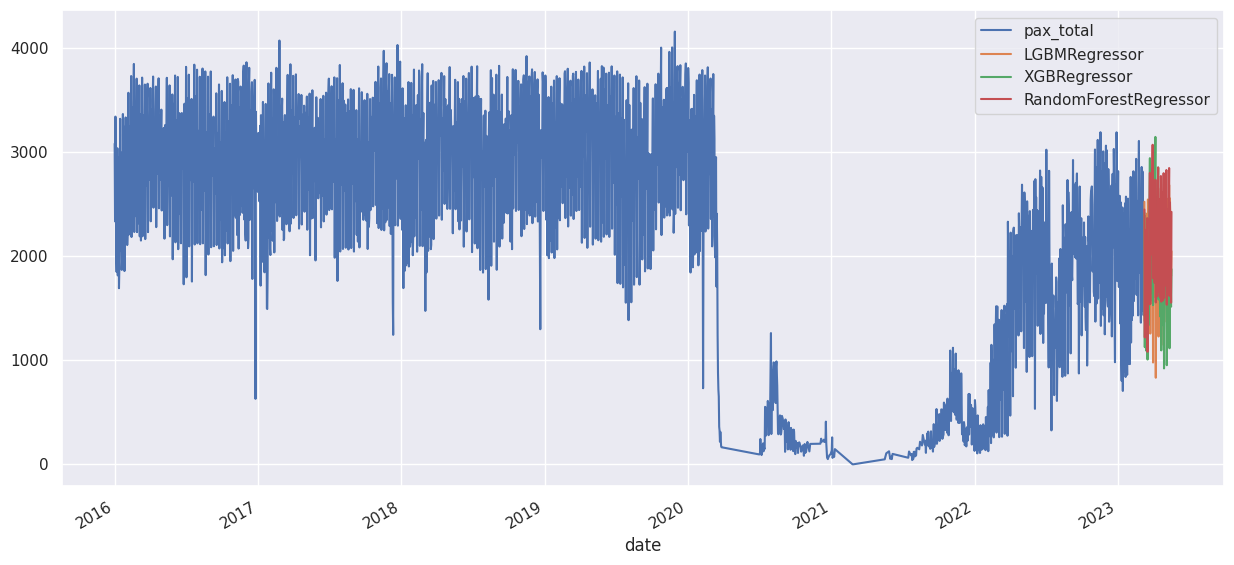

In [121]:
(pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtla_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [122]:
draw_ts_multiple((pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
                             nixtla_model.predict(7*10)])),
                 v1='pax_total', v2='LGBMRegressor');

In [123]:
crossvalidation_df = fcst.cross_validation(
    data=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
    window_size=90,
    n_windows=5,
    id_col='home_airport',
    time_col='date',
    target_col='pax_total'
)

In [124]:
crossvalidation_df

home_airport       date     cutoff  pax_total  LGBMRegressor  XGBRegressor  \
0           LGW 2021-12-15 2021-12-14      229.0     348.645547    281.325165   
1           LGW 2021-12-16 2021-12-14      429.0     593.762678    508.705139   
2           LGW 2021-12-17 2021-12-14      676.0     670.195026    623.942871   
3           LGW 2021-12-18 2021-12-14      286.0     409.170319    532.024414   
4           LGW 2021-12-19 2021-12-14      676.0     803.159270    850.288818   
..          ...        ...        ...        ...            ...           ...   
85          LGW 2023-03-05 2022-12-09     2815.0    1865.829097   2310.340332   
86          LGW 2023-03-06 2022-12-09     1916.0    2222.291755   2665.737549   
87          LGW 2023-03-07 2022-12-09     1741.0    2131.488022   1903.722290   
88          LGW 2023-03-08 2022-12-09     1432.0    2069.155381   1967.471924   
89          LGW 2023-03-09 2022-12-09     2029.0    2307.119953   2178.843750   

    RandomForestRegressor  
0                  267.72  
1                  428.76  
2                  445.82  
3                  339.56  
4                  678.39  
..                    ...  
85                1553.94  
86                1668.80  
87                1928.02  
88                2089.95  
89                2303.74  

[450 rows x 7 columns]

#### Evaluate the performances

In [125]:
import numpy as np

def mse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.nanmean(delta_y)

def rmse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.sqrt(mse(y, y_hat))

In [126]:
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("LGBM RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['RandomForestRegressor'])).mean()
print("RandomForest RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['XGBRegressor'])).mean()
print("XGBoost RMSE using cross-validation: ", cv_rmse)

cv_rmse = (crossvalidation_df
           .assign(Ensemble=lambda _df: _df[['LGBMRegressor', 'RandomForestRegressor', 'XGBRegressor']].mean(axis=1))
           .groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['Ensemble'])).mean())
print("Ensemble RMSE using cross-validation: ", cv_rmse)

LGBM RMSE using cross-validation:  1123.0405776208863
RandomForest RMSE using cross-validation:  1013.2061289311698
XGBoost RMSE using cross-validation:  1220.3735710301205
Ensemble RMSE using cross-validation:  1047.6225207933953


#### Automate model fitting and evaluation

In [127]:
def generate_air_route_df(traffic_df: pd.DataFrame, flight:str) -> pd.DataFrame:
  """Extract route dataframe from traffic dataframe for route from home airport to paired airport

  Args:
  - traffic_df (pd.DataFrame): traffic dataframe
  - homeAirport (str): IATA Code for home airport
  - pairedAirport (str): IATA Code for paired airport

  Returns:
  - pd.DataFrame: aggregated daily PAX traffic on route (home-paired)
  """
  _df = (traffic_df
         .query('home_airport == "{home_aiport}" and paired_airport == "{paired_airport}"'.format(home_aiport = air_route[flight]['home_airport'], paired_airport = air_route[flight]['paired_airport']))
         .groupby(['home_airport', 'paired_airport', 'date'])
         .agg(pax_total=('pax', 'sum'))
         .reset_index()
         )
  return _df

In [128]:
airroute_df = traffic_df[['home_airport', 'paired_airport']].drop_duplicates()
airroute_df['flight'] = airroute_df.apply(lambda row: row['home_airport'] + '_' + row['paired_airport'], axis=1)
airroute_df.index = airroute_df['flight']
air_route = airroute_df.set_index('flight').to_dict(orient='index')

In [129]:
tested_models = [
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]


fcst = MLForecast(
    models=tested_models,
    freq='D',
    lags=[7, 14, 21, 28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek'],
    differences=[1],
)

In [130]:
models_nixtla = dict()

for index, route in airroute_df.iterrows():
  print(route)
  home = route['home_airport']
  paired = route['paired_airport']
  _model = fcst.fit(generate_air_route_df(traffic_df, index).drop(columns=['paired_airport']),
                        id_col='home_airport', time_col='date', target_col='pax_total')
  models_nixtla[index] = _model

home_airport          LGW
paired_airport        BCN
flight            LGW_BCN
Name: LGW_BCN, dtype: object
home_airport          LGW
paired_airport        AMS
flight            LGW_AMS
Name: LGW_AMS, dtype: object
home_airport          LIS
paired_airport        ORY
flight            LIS_ORY
Name: LIS_ORY, dtype: object
home_airport          LIS
paired_airport        OPO
flight            LIS_OPO
Name: LIS_OPO, dtype: object
home_airport          SSA
paired_airport        GRU
flight            SSA_GRU
Name: SSA_GRU, dtype: object
home_airport          NTE
paired_airport        FUE
flight            NTE_FUE
Name: NTE_FUE, dtype: object
home_airport          LYS
paired_airport        PIS
flight            LYS_PIS
Name: LYS_PIS, dtype: object
home_airport          PNH
paired_airport        NGB
flight            PNH_NGB
Name: PNH_NGB, dtype: object
home_airport          POP
paired_airport        JFK
flight            POP_JFK
Name: POP_JFK, dtype: object
home_airport          SCL
paired_airp

#### Save the models

In [131]:
for model, key in zip(models_nixtla, air_route.keys()):
  _filename = 'route_model_nixtla_{key}.joblib'.format(key=key)
  dump(models_nixtla[model], _filename)

In [132]:
models_nixtla

{'LGW_BCN': MLForecast(models=[XGBRegressor, RandomForestRegressor], freq=<Day>, lag_features=['lag7', 'lag14', 'lag21', 'lag28', 'expanding_mean_lag1', 'rolling_mean_28_lag7'], date_features=['dayofweek'], num_threads=1),
 'LGW_AMS': MLForecast(models=[XGBRegressor, RandomForestRegressor], freq=<Day>, lag_features=['lag7', 'lag14', 'lag21', 'lag28', 'expanding_mean_lag1', 'rolling_mean_28_lag7'], date_features=['dayofweek'], num_threads=1),
 'LIS_ORY': MLForecast(models=[XGBRegressor, RandomForestRegressor], freq=<Day>, lag_features=['lag7', 'lag14', 'lag21', 'lag28', 'expanding_mean_lag1', 'rolling_mean_28_lag7'], date_features=['dayofweek'], num_threads=1),
 'LIS_OPO': MLForecast(models=[XGBRegressor, RandomForestRegressor], freq=<Day>, lag_features=['lag7', 'lag14', 'lag21', 'lag28', 'expanding_mean_lag1', 'rolling_mean_28_lag7'], date_features=['dayofweek'], num_threads=1),
 'SSA_GRU': MLForecast(models=[XGBRegressor, RandomForestRegressor], freq=<Day>, lag_features=['lag7', 'lag1

### Model with Neural Forecast

In [133]:
horizon = 90
models = [NBEATS(input_size=2 * horizon, h=horizon, max_epochs=50),
          NHITS(input_size=2 * horizon, h=horizon, max_epochs=50)]

INFO:lightning_fabric.utilities.seed:Global seed set to 1
INFO:lightning_fabric.utilities.seed:Global seed set to 1


In [134]:
nforecast = NeuralForecast(models=models, freq='D')
nforecast.fit(df=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                      'date': 'ds',
                                                                                                      'pax_total': 'y'}))

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [135]:
nforecast.predict().reset_index()

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

unique_id         ds       NBEATS        NHITS
0        LGW 2023-03-10  2265.771729  2095.367188
1        LGW 2023-03-11  1099.371582  1419.447144
2        LGW 2023-03-12  1955.275635  1915.259521
3        LGW 2023-03-13  1979.947266  2003.247070
4        LGW 2023-03-14  1705.986816  1756.988159
..       ...        ...          ...          ...
85       LGW 2023-06-03  1152.167725  1497.580322
86       LGW 2023-06-04  1912.655151  1860.950806
87       LGW 2023-06-05  2048.486328  1970.539673
88       LGW 2023-06-06  1654.967651  1637.420532
89       LGW 2023-06-07  1523.215088  1622.174805

[90 rows x 4 columns]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='ds'>

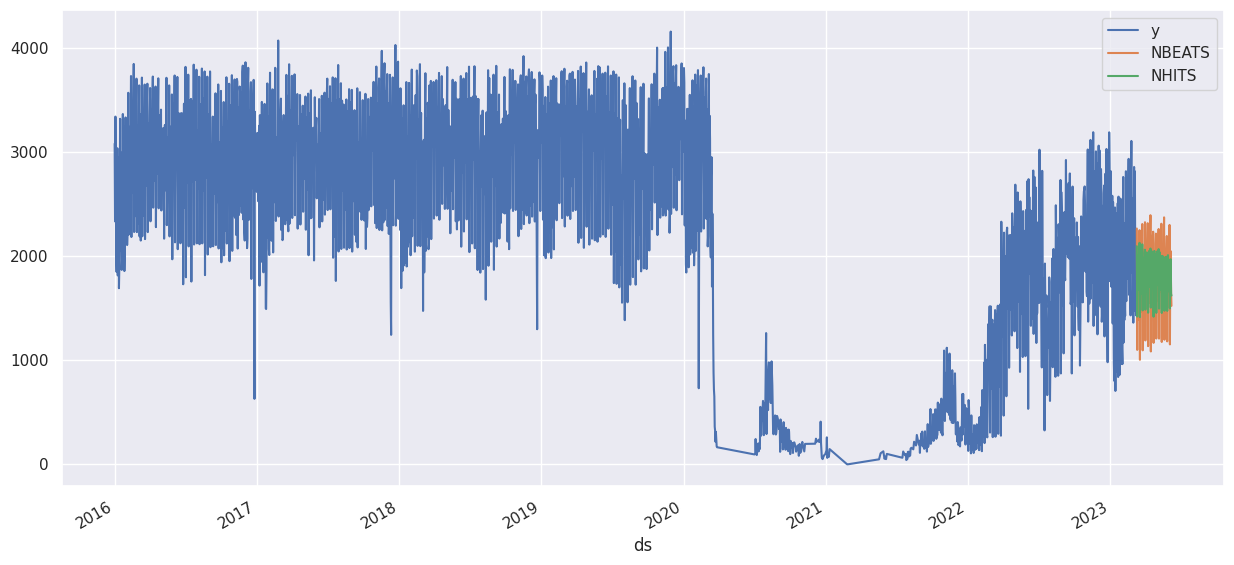

In [136]:
pd.concat(
    [
        generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                     'date': 'ds',
                                                                                                     'pax_total': 'y'}),
        nforecast.predict().reset_index()
    ]
).set_index('ds').plot(figsize=(15,7))

In [137]:
horizon = 30
models = [NBEATS(input_size=2 * horizon, h=horizon, max_epochs=5),
          NHITS(input_size=2 * horizon, h=horizon, max_epochs=5)]
nforecast = NeuralForecast(models=models, freq='D')

INFO:lightning_fabric.utilities.seed:Global seed set to 1
INFO:lightning_fabric.utilities.seed:Global seed set to 1


In [138]:
models_NeuralForecast = dict()

for index, route in airroute_df.iterrows():
  print(route)
  home = route['home_airport']
  paired = route['paired_airport']
  _model = nforecast.fit(generate_air_route_df(traffic_df, index).drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                      'date': 'ds',
                                                                                                      'pax_total': 'y'}))
  models_NeuralForecast[index] = _model

home_airport          LGW
paired_airport        BCN
flight            LGW_BCN
Name: LGW_BCN, dtype: object


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

home_airport          LGW
paired_airport        AMS
flight            LGW_AMS
Name: LGW_AMS, dtype: object


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

home_airport          LIS
paired_airport        ORY
flight            LIS_ORY
Name: LIS_ORY, dtype: object


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

home_airport          LIS
paired_airport        OPO
flight            LIS_OPO
Name: LIS_OPO, dtype: object


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

home_airport          SSA
paired_airport        GRU
flight            SSA_GRU
Name: SSA_GRU, dtype: object


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

home_airport          NTE
paired_airport        FUE
flight            NTE_FUE
Name: NTE_FUE, dtype: object


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

home_airport          LYS
paired_airport        PIS
flight            LYS_PIS
Name: LYS_PIS, dtype: object


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

home_airport          PNH
paired_airport        NGB
flight            PNH_NGB
Name: PNH_NGB, dtype: object


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

home_airport          POP
paired_airport        JFK
flight            POP_JFK
Name: POP_JFK, dtype: object


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

home_airport          SCL
paired_airport        LHR
flight            SCL_LHR
Name: SCL_LHR, dtype: object


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

#### Save the models

In [139]:
for model, key in zip(models_NeuralForecast, air_route.keys()):
  _filename = 'route_model_NeuralForecast_{key}.joblib'.format(key=key)
  dump(models_NeuralForecast[model], _filename)